# Prova escrita 2 - Estadística.

La WHO (OMS) ha quedat impressionada amb les pràctiques que heu realitzat a DAWBIO2 aquest curs i és per això 
que us encarrega resoldre preguntes importants sobre el dataset adjunt **incidence-rate-2021-raw.csv**
, que recopila la incidència de les enfermetats en tot el món.
Si extraieu gràfics, coneixement i conclusions rellevants segur que voldran contractar-vos. 

## Autor: <nom-cognoms>

### Observacions:
#### Consulta al professor quan hagis aconseguit cada gràfic que es demana.
#### Els gràfics de la carpeta output són orientatius, no és necessari que us quedin igual; l'important és resoldre les preguntes.
#### Pots utilitzar més d'un fitxer Jupyter Notebook per a fer l'examen si et va bé, o fitxers de Python.
#### Molts ànims!

## Part 1. Preguntes bàsiques, gestió de valors NA, gràfic bàsic i outliers. (3 punts)

### 1.1 Preguntes bàsiques. 1 punts.
### 1.2 Gràfic de files de cada GROUP. 1 punts.
### 1.3 Gràfic d'outliers. 1 punts.

Us donem el codi de la importació i el context de les dades.

### Importació del Dataset.

Mostrem les primeres files i els dtypes de cada columna.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy

/home/mamorosal/anaconda3/envs/bio/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
incidence_raw = pd.read_csv("incidence-rate-2021-raw.csv", sep=';', decimal=".")

incidence_new = copy.deepcopy(incidence_raw)

print(incidence_raw.dtypes)

print(incidence_raw.head(20))

GROUP                   object
CODE                    object
NAME                    object
YEAR                     int64
DISEASE                 object
DISEASE_DESCRIPTION     object
DENOMINATOR             object
INCIDENCE_RATE         float64
dtype: object
        GROUP CODE   NAME  YEAR     DISEASE          DISEASE_DESCRIPTION  \
0   COUNTRIES  ABW  Aruba  2021         CRS  Congenital rubella syndrome   
1   COUNTRIES  ABW  Aruba  2021  DIPHTHERIA                   Diphtheria   
2   COUNTRIES  ABW  Aruba  2021     MEASLES                      Measles   
3   COUNTRIES  ABW  Aruba  2021       MUMPS                        Mumps   
4   COUNTRIES  ABW  Aruba  2021    NTETANUS             Neonatal tetanus   
5   COUNTRIES  ABW  Aruba  2021   PERTUSSIS                    Pertussis   
6   COUNTRIES  ABW  Aruba  2021       POLIO                Poliomyelitis   
7   COUNTRIES  ABW  Aruba  2021     RUBELLA                      Rubella   
8   COUNTRIES  ABW  Aruba  2021    TTETANUS           

### Pregunta 1.1 -> Preguntes bàsiques: files, tipus de dades, NA's

#### Explicació del context. Què son aquestes dades? Posar referències.

Representen els ratios d'incidencia de casos de diferents enfermedades contagioses en molts països. 
Aquest ratio està representat pel camp **INCIDENCE_RATE.**

S'utilitzen diverses maneres de calcular aquestes ratios, ho indica el camp **DENOMINATOR.**
No és el mateix mesurar 'per 1,000,000 total population' que ';per 1,000,000 <15 population'

**GROUP** Pot ser un país, una agrupació de països o un estat.

**CODE** és la abreviatura del nom del país/estat/grup **NAME** .

**DISEASE** és el nom de la enfermetat.

**YEAR**: Des de 1980 a 2021

#### Referència:

Dataset extret del portal Inmunization Data, de la WHO (la OMS)

[https://immunizationdata.who.int/listing.html?topic=&location=]

#### Quantes files té el dataset ? 

In [5]:
len (incidence_new)

79448

### Llista els valors possibles que poden tenir els camps DENOMINATOR, el GROUP i el DISEASE.

In [6]:
incidence_new.loc[:,"DENOMINATOR"].unique()

array(['per 10,000 live births', 'per 1,000,000 total population',
       'per 1,000 live births', 'per 1,000,000 <15 population',
       'per 1000 live births'], dtype=object)

In [7]:
incidence_new.loc[:,"DISEASE"].value_counts()

MEASLES       8929
NTETANUS      8909
DIPHTHERIA    8908
PERTUSSIS     8907
POLIO         8883
TTETANUS      8855
YFEVER        8850
RUBELLA       4787
CRS           4733
MUMPS         4704
JAPENC        2983
Name: DISEASE, dtype: int64

### Optimització del dataframe.

Elimina la fila "DISEASE_DESCRIPTION" i "CODE". No és necessari tenir aquestes files dins de la taula.

En SQL aquests valors estarien en una taula apart, accessible des d'una foreign key comuna entre les 2 taules, que seria DISEASE.

In [8]:
incidence_new.drop(columns=['DISEASE_DESCRIPTION','CODE'])

,GROUP,NAME,YEAR,DISEASE,DENOMINATOR,INCIDENCE_RATE
0,COUNTRIES,Aruba,2021,CRS,"per 10,000 live births",0.0
1,COUNTRIES,Aruba,2021,DIPHTHERIA,"per 1,000,000 total population",0.0
2,COUNTRIES,Aruba,2021,MEASLES,"per 1,000,000 total population",0.0
3,COUNTRIES,Aruba,2021,MUMPS,"per 1,000,000 total population",0.0
4,COUNTRIES,Aruba,2021,NTETANUS,"per 1,000 live births",0.0
...,...,...,...,...,...,...
79443,COUNTRIES,Zimbabwe,1980,NTETANUS,"per 1,000 live births",0.4
79444,COUNTRIES,Zimbabwe,1980,PERTUSSIS,"per 1,000,000 total population",892.2
79445,COUNTRIES,Zimbabwe,1980,POLIO,"per 1,000,000 <15 population",9.1
79446,COUNTRIES,Zimbabwe,1980,TTETANUS,"per 1,000,000 total population",19.7


### Hi ha NAs? En quines columnes ? Quina columna en té més ? 

In [9]:
#incidence = incidence.dropna()
incidence_new.isna().sum()

# La columna INCIDENCE_RATE en té molts.

# para no tener NAs y teniendo en cuenta que solo en el ratio de incidencias tenemos podemos 
# convertir todos los NAs a 0 para poder hacer operaciones aritmeticas como sumar

GROUP                      0
CODE                       0
NAME                       0
YEAR                       0
DISEASE                    0
DISEASE_DESCRIPTION        0
DENOMINATOR                0
INCIDENCE_RATE         18637
dtype: int64

### Resultat final preguntes bàsiques. Guarda totes les files que tinguin com a GROUP=COUNTRIES en un fitxer, i com a GROUP=GLOBAL en un altre fitxer.

<em> No oblidis eliminar la columna GROUP, ja que ja no servirà. </em>

In [10]:
# def df_incidence_rate_by_disease(diseases:str, df:pd.DataFrame): 

mask_countries = incidence_new.loc[:,"GROUP"] == "COUNTRIES"
df_incidence_countries = incidence_new.loc[mask_countries,:]
df_incidence_countries = df_incidence_countries.drop(columns=['GROUP'])
df_incidence_countries.to_csv('incidence_rate_2021_countries.csv', index=False, sep=';', decimal=",")

mask_global = incidence_new.loc[:,"GROUP"] == "GLOBAL"
df_incidence_global = incidence_new.loc[mask_global,:]
df_incidence_global = df_incidence_global.drop(columns=['GROUP'])
df_incidence_global.to_csv('incidence_rate_2021_global.csv', index=False, sep=';', decimal=",")

### Pregunta 1.2 -> Crea un gràfic (de barres o circular) que mostri el número de files que hi ha de cada valor de la columna GROUP.

Hi ha 3 tipus de GROUP: COUNTRIES, GLOBAL i WHO_REGIONS.


/home/mamorosal/anaconda3/envs/bio/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Número de files para cada valor de la columna GROUP')

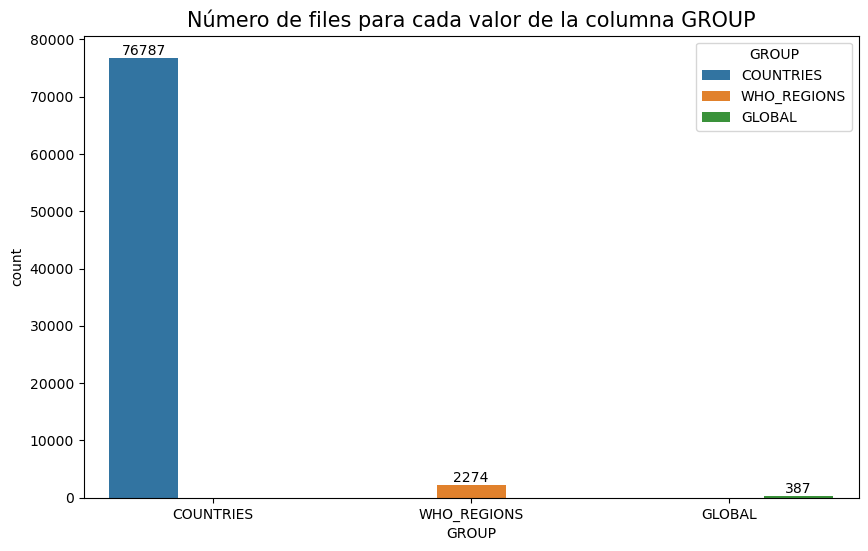

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(incidence_new.GROUP, hue=incidence_new['GROUP'])
# Número absolut dins del gràfic.
for container in ax.containers:
    ax.bar_label(container)
plt.title("Número de files para cada valor de la columna GROUP",fontdict={'fontsize':15})

### Pregunta 1.3 -> Gràfics d'Outliers de les enfermetats d'un país.

**Des del dataframe resultant de la pregunta 1.1; o bé des del fitxer <em>incidence_rate_2021_countries.csv<em> crea un gràfic plotbox de les enfermetats d'un país (el que tu vulguis), únicament de les que es mesuren amb el denominador: 'per 1,000,000 total population'.**

**Després, mostra les 5 files d'outliers més alts (les més allunyades de la mitjana)**



<em>Pista: Recomanem fer-lo amb seaborn, que permet seleccionar quina fila (x) i columna (y) volem posar al gràfic<em>

      CODE   NAME  YEAR     DISEASE    DISEASE_DESCRIPTION  \
22223  ESP  Spain  2021  DIPHTHERIA             Diphtheria   
22224  ESP  Spain  2021      JAPENC  Japanese encephalitis   
22225  ESP  Spain  2021     MEASLES                Measles   
22226  ESP  Spain  2021       MUMPS                  Mumps   
22228  ESP  Spain  2021   PERTUSSIS              Pertussis   
...    ...    ...   ...         ...                    ...   
22586  ESP  Spain  1980  DIPHTHERIA             Diphtheria   
22587  ESP  Spain  1980     MEASLES                Measles   
22589  ESP  Spain  1980   PERTUSSIS              Pertussis   
22591  ESP  Spain  1980    TTETANUS          Total tetanus   
22592  ESP  Spain  1980      YFEVER           Yellow fever   

                          DENOMINATOR  INCIDENCE_RATE  
22223  per 1,000,000 total population             0.0  
22224  per 1,000,000 total population             0.0  
22225  per 1,000,000 total population             0.0  
22226  per 1,000,000 total popu

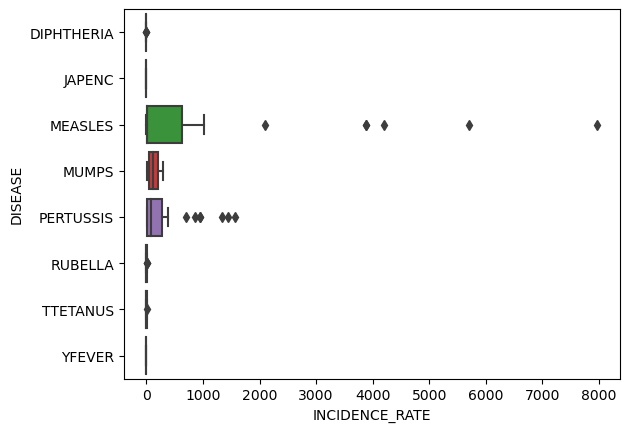

In [12]:
df_incidence_countries_esp = df_incidence_countries.query("NAME == 'Spain'")
df_incidence_countries_esp = df_incidence_countries_esp.query("DENOMINATOR == 'per 1,000,000 total population'")

sns.boxplot(data=df_incidence_countries_esp, x='INCIDENCE_RATE', y='DISEASE')

print(df_incidence_countries_esp)

In [13]:
## Valors outlier màxims.

print(df_incidence_countries_esp.sort_values(by='INCIDENCE_RATE', ascending=False).head(5))


      CODE   NAME  YEAR  DISEASE DISEASE_DESCRIPTION  \
22566  ESP  Spain  1983  MEASLES             Measles   
22545  ESP  Spain  1986  MEASLES             Measles   
22573  ESP  Spain  1982  MEASLES             Measles   
22580  ESP  Spain  1981  MEASLES             Measles   
22587  ESP  Spain  1980  MEASLES             Measles   

                          DENOMINATOR  INCIDENCE_RATE  
22566  per 1,000,000 total population          7973.6  
22545  per 1,000,000 total population          5703.7  
22573  per 1,000,000 total population          4201.0  
22580  per 1,000,000 total population          3884.9  
22587  per 1,000,000 total population          3876.1  


## Part 2 - Fes dues gràfiques d'incidència de les enfermetats: (2,5 punts)

### Una on es vegi la incidència de les enfermetats d'un país(el que tu vulguis) des del 1980 fins el 2021, ambdós inclosos.
### Una altre on es vegi la incidència de les enfermetats a nivell global (files on el camp GROUP=GLOBAL, també dels anys 1980-2021 ambdós inclosos.

### Filtrarem les enfermetats pels valors de la columna DENOMINATOR = 'per 1,000,000 total population' 

[Text(0.5, 1.0, 'Incidència enfermetats a Espanya (1980-2021')]

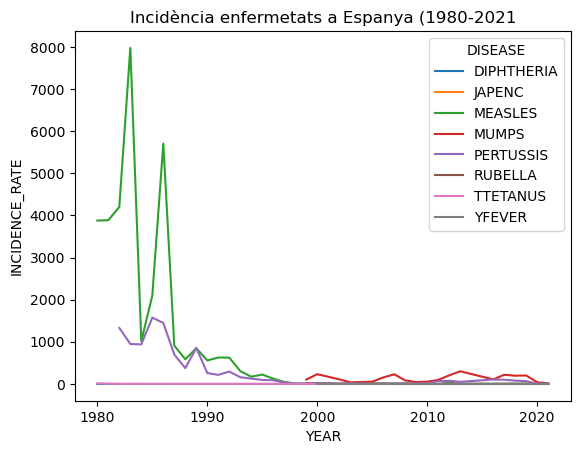

In [14]:
# df_incidence_countries_esp = df_incidence_countries.query("NAME == 'Spain'")
# df_incidence_countries_esp = df_incidence_countries_esp.query("DENOMINATOR == 'per 1,000,000 total population'")

sns.lineplot(data=df_incidence_countries_esp, x="YEAR", y="INCIDENCE_RATE", hue="DISEASE") \
    .set(title='Incidència enfermetats a Espanya (1980-2021')

# la grafica tiene algunos cortes y no sabría decir porque, podría ser que no tuvieran casos 
# o que por algún motivo no pudieron medir la incidencia durante ese periodo. 

[Text(0.5, 1.0, 'Incidència enfermetats als Paísos de la OMS (1980-2021')]

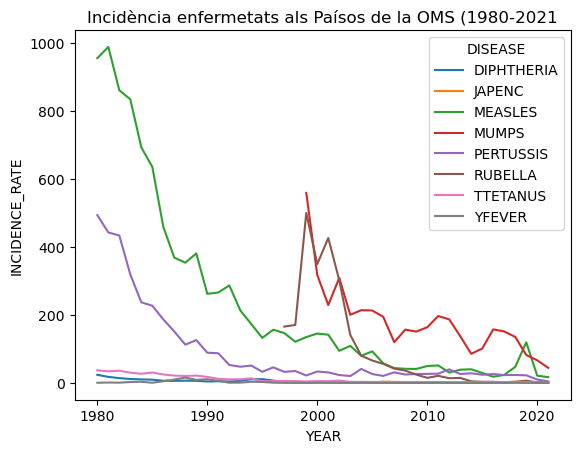

In [15]:
df_incidence_global = df_incidence_global.query("DENOMINATOR == 'per 1,000,000 total population'")

sns.lineplot(data=df_incidence_global, x="YEAR", y="INCIDENCE_RATE", hue="DISEASE") \
    .set(title='Incidència enfermetats als Paísos de la OMS (1980-2021')

## Part 3. Crea un gràfic que serveixi per comparar les dades d'una enfermetat amb molta incidència (per exemple MEASLES) a una agrupació de països del món que tingui almenys 3 països. Afegeix una fila més (2,5 punts)

Pots limitar els anys que apareixen al gràfic (pex 1980 - 1999) si creus que no aporten dades significatives.

Exemple: Incidència del xarampió als països del sud del Mediterrani. ['Morocco', 'Algeria', 'Libya', 'Egypt', 'Jordan', 'Israel']

['Algeria' 'Egypt' 'Israel' 'Jordan' 'Libya' 'Morocco']


<AxesSubplot:xlabel='YEAR', ylabel='INCIDENCE_RATE'>

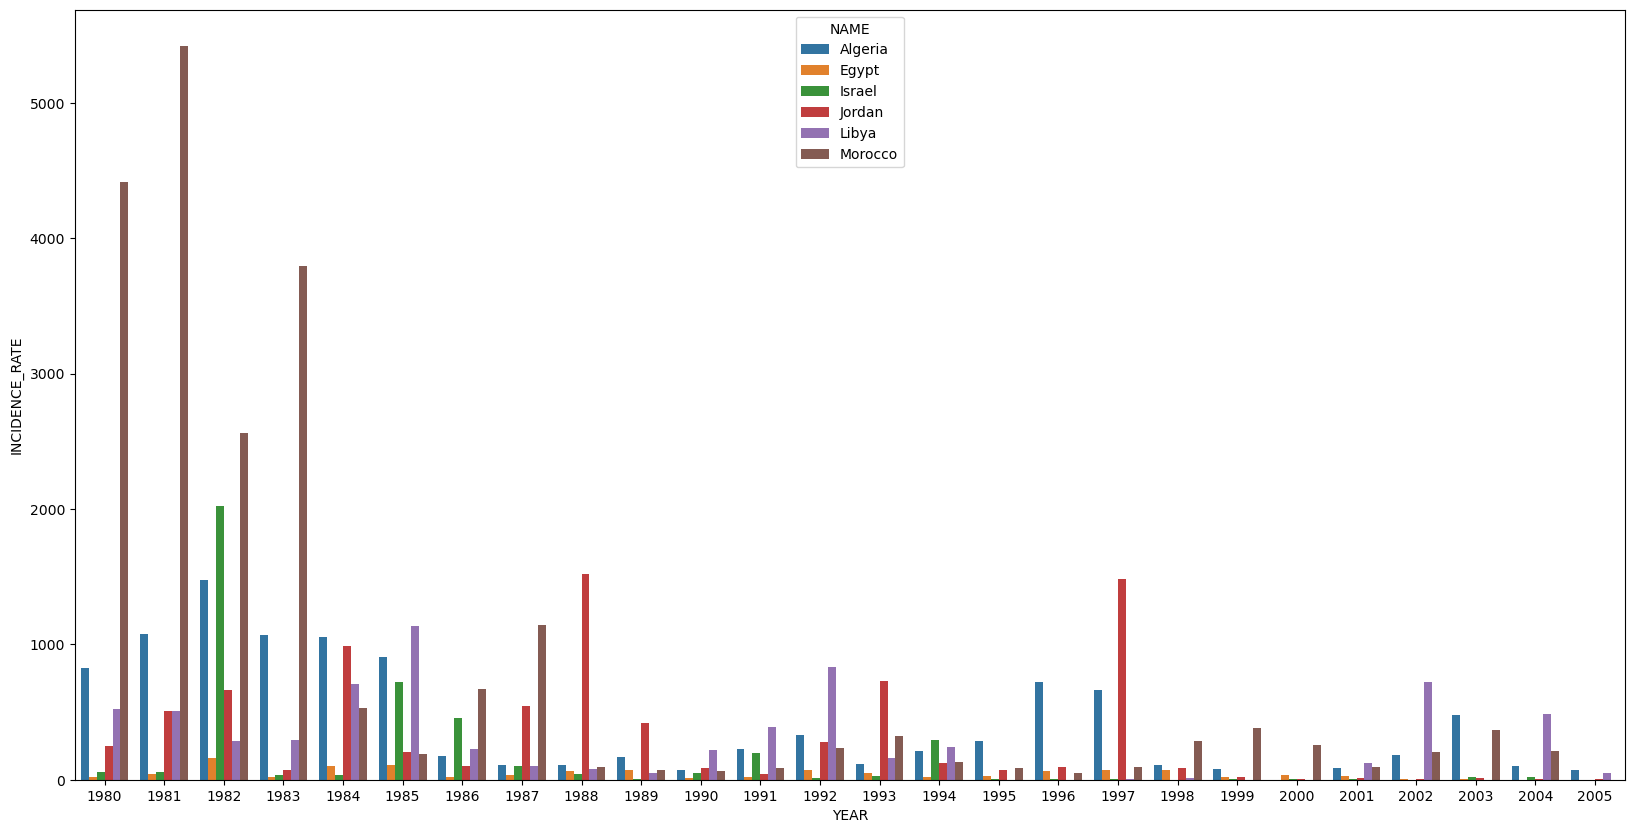

In [16]:
df_incidence_countries_measles = copy.deepcopy(df_incidence_countries)

# Only Measles
df_incidence_countries_measles = df_incidence_countries_measles.query("DISEASE == 'MEASLES'")

df_incidence_countries_measles = df_incidence_countries_measles.query("YEAR <= 2005")

#Only some countries.
mediterrean_countries: list[str] = ['Spain', 'France', 'Morocco', 'Portugal', 'Algeria', 'Egypt', 'Italy', 'Malta', 'Tunisia']
south_mediterrean_countries: list[str] = ['Morocco', 'Algeria', 'Libya', 'Egypt', 'Jordan', 'Israel']

df_incidence_countries_measles = df_incidence_countries_measles[df_incidence_countries_measles['NAME'].isin(south_mediterrean_countries)]

print(df_incidence_countries_measles['NAME'].unique())

plt.figure(figsize=(20, 10))
sns.barplot(data=df_incidence_countries_measles, x="YEAR", y="INCIDENCE_RATE", hue="NAME")


## Part 4. Taula de coeficients de correlació entre enfermetats en un país. (2 punts)

Ens demanen comparar la correlació entre 4 enfermetats amb força incidència; per saber si existeix correlació entre elles.

Pots triar el país que vulguis on fer l'estudi; si no saps quin pots triar Espanya.

Les enfermetats a estudiar són:

1. PERTUSSIS
2. MEASELS
3. MUMPS
4. RUBELLA

#### Pistes
<em>* Tal i com estan organitzats els dataframes no ho podràs fer; hauràs de crear un altre dataframe que tingui una fila amb l'any, 
les demés 4 files els valors d'incidència de cada enfermetat. </em>
<em>* Fixa't com ha de quedar la matriu</em>
<em>* Fixa't com ha de quedar la matriu</em>
<em>* Un cop tinguis organitzada la matriu, el mètode <strong>corr</strong> és el que obté els coeficients de correlació valors entre (-1 , +1) </em>


#### Primer, creo 2 dataframes que tinguin el radi d'incidència per any de 2 enfermetats i després les fusiono en un únic dataframe, que és el que aplicaré el gràfic.

Per facilitar aquesta creació creo una següent funció.

La forma del dataframe resultat ha de tenir la següent estructura:


      MEASLES  PERTUSSIS
YEAR                    
2021      0.0        1.2
2020      1.9        5.1
2019      6.1       65.2
2018      4.8       78.3
2017      3.5       99.5


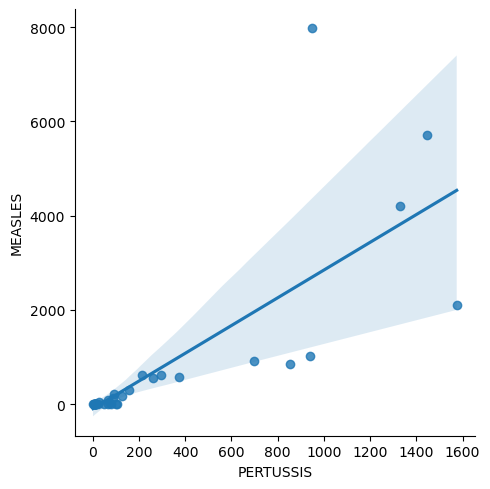

In [17]:
# Agafo el dataframe de les enfermetats a Espanya
# df_incidence_countries_esp 

## Funció auxiliar que, donat el nom d'una enfermetat i el dataframe sencer,
## et retorna un datafame amb 2 files, l'any i el incidence_rate de la enfermetat.
def dataframe_incidence_rate_eachyear_bydisease(disease:str, df:pd.DataFrame):
    result = df.query("NAME == 'Spain'")
    result = result.query("DISEASE == @disease")
    result = result.loc[:,['YEAR','INCIDENCE_RATE']]
    result = result.set_index("YEAR")
    result = result.rename(columns={"INCIDENCE_RATE":disease})
    return result

df_incidence_measels = dataframe_incidence_rate_eachyear_bydisease('MEASLES',df_incidence_countries_esp)
df_incidence_pertussis = dataframe_incidence_rate_eachyear_bydisease('PERTUSSIS',df_incidence_countries_esp)

corr_measels_pert = pd.concat([df_incidence_measels, df_incidence_pertussis], axis=1, join="inner")

corr_measels_pert.to_csv('incidence_rate_esp_measles_pertussis_2021.csv', index=False, sep=';', decimal=".")

# Provem que funciona el mètode
print(corr_measels_pert.head()) 
sns.lmplot(x='PERTUSSIS',y='MEASLES',data=corr_measels_pert,fit_reg=True)

In [18]:
df_incidence_mumps = dataframe_incidence_rate_eachyear_bydisease('MUMPS',df_incidence_countries_esp)
df_incidence_rubella = dataframe_incidence_rate_eachyear_bydisease('RUBELLA',df_incidence_countries_esp)


Un cop tenim els 4 dataframes, els podem concatenar per tal de tenir una matriu amb les incidències de cada enfermetat.

Finalment, podem aplicar la funció corr per obtenir una matriu 
de la correlació entre cada variable, amb valors dins l'intèrval (-1, +1)

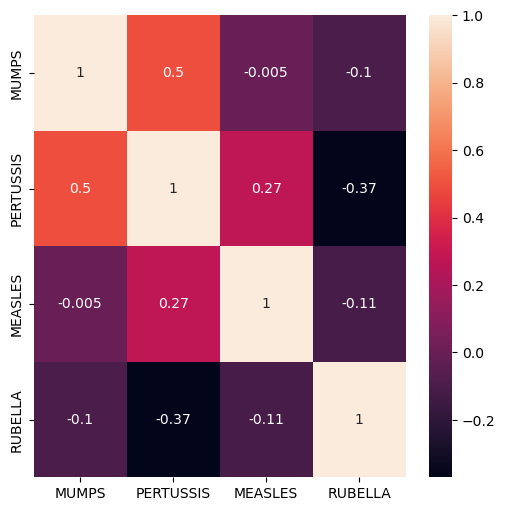

In [19]:
incidence_matrix = pd.concat([df_incidence_mumps, df_incidence_pertussis, df_incidence_measels, df_incidence_rubella], axis=1, join="inner")

incidence_matrix.to_csv('q4_incidence_rate_matrix_2021.csv', index=False, sep=';', decimal=".")

plt.figure(figsize=(6, 6))

corr_matrix = incidence_matrix.corr(method='pearson')

sns.heatmap(corr_matrix, annot=True)

corr_matrix.to_csv('q4_incidence_corr_matrix_2021.csv', index=False, sep=';', decimal=".")


### Creus que hi ha una bona correlació entre aquests parells d'enfermetats ? 

#### Tos Farina - Xaramipió. 
Hi ha certa correlació, excepte en els moments que hi ha hagut més casos.

#### Tos Farina - Paperes. 
No es detecta cap correlació, tots els punts molt separats de la recta.

#### Rubeola - Tos Farina. 
Una correlació negativa lleu, podem deduïr que és estrany tenir les 2 enfermetats alhora.